# Ridge and Lasso Regularisation

We make the features polynomials based on
$\hat{y} = \theta_1 + \theta_1 x + \theta_2 x^2 + \ldots + \theta_p x^p$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
pd.options.display.float_format = '{:,.6g}'.format
%matplotlib inline

In [2]:
np.random.seed(10)
m = 100
x = np.array([i*np.pi/180.0 for i in np.linspace(60,300,m)])
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])

In [3]:
data.shape

(100, 2)

In [4]:
data.head()

,x,y
0,1.0472,1.06576
1,1.08951,0.993691
2,1.13182,0.673377
3,1.17413,0.921097
4,1.21644,1.03107


In [5]:
data.tail()

,x,y
95,5.06674,-0.80013
96,5.10905,-0.994668
97,5.15137,-0.891749
98,5.19368,-0.76235
99,5.23599,-1.1592


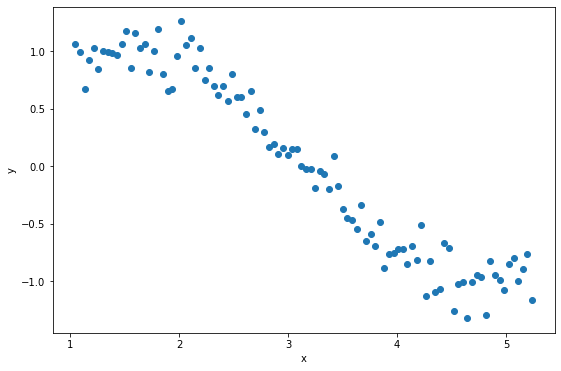

In [6]:
plt.figure(figsize=(9,6))
plt.xlabel('x')
plt.ylabel('y') 
plt.plot(data['x'],data['y'],'o')

In [7]:
for i in range(1,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i

In [8]:
data.head()

,x,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.0472,1.06576,1.0472,1.09662,1.14838,1.20258,1.25934,1.31878,1.38102,1.4462,1.51446,1.58594,1.66079,1.73918,1.82126,1.90722,1.99724
1,1.08951,0.993691,1.08951,1.18703,1.29328,1.40904,1.53516,1.67257,1.82228,1.98539,2.1631,2.35671,2.56766,2.79749,3.04788,3.3207,3.61793
2,1.13182,0.673377,1.13182,1.28102,1.44988,1.641,1.85732,2.10215,2.37925,2.69288,3.04786,3.44963,3.90435,4.41902,5.00154,5.66084,6.40705
3,1.17413,0.921097,1.17413,1.37858,1.61864,1.90049,2.23142,2.61998,3.0762,3.61186,4.2408,4.97925,5.84629,6.86431,8.0596,9.46302,11.1108
4,1.21644,1.03107,1.21644,1.47973,1.80001,2.1896,2.66352,3.24002,3.94129,4.79435,5.83205,7.09435,8.62986,10.4977,12.7699,15.5338,18.896


We want to see how many powers we need

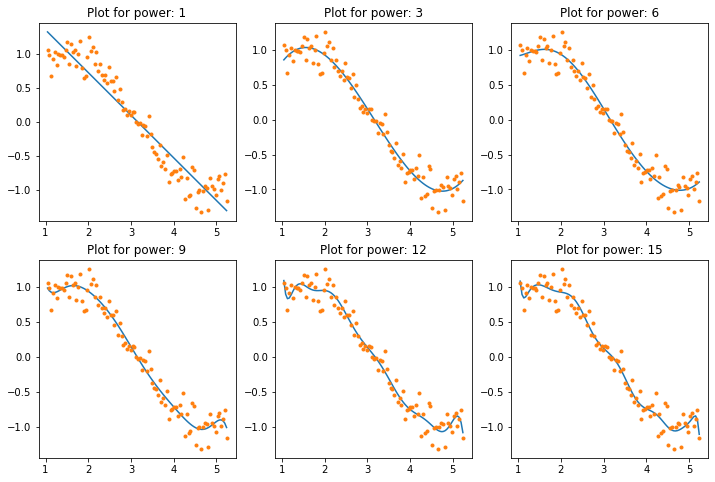

In [9]:
from sklearn import linear_model

def plotRegression(data,power,plotarea,plotFlag):
    
    predictors=[]    
    # generate list of header names for prediction
    for i in range(1,power+1): predictors.append('x_%d'%i)

    linreg = linear_model.LinearRegression(normalize=True)
    
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    rss = np.sqrt(sum((y_pred-data['y'])**2)/len(y_pred))
#    print("Power:",power,"RMS error:",rss)
    
    if plotFlag == True:
        plt.subplot(plotarea)
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    return rss, linreg.intercept_, linreg.coef_

plt.figure(figsize=(12,8))
plotRegression(data,1,231,True);
plotRegression(data,3,232,True);
plotRegression(data,6,233,True);
plotRegression(data,9,234,True);
plotRegression(data,12,235,True);
plotRegression(data,15,236,True);

In [10]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['Pow_%d'%i for i in range(1,16)]

#Iterate through all powers and assimilate results
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

for i in range(1,16):
    rss, intercept, coefficients = plotRegression(data,i,"",False);
    coef_matrix_simple.iloc[i-1][0] = rss
    coef_matrix_simple.iloc[i-1][1] = intercept
    
    for j in range(0,len(coefficients)):
        coef_matrix_simple.iloc[i-1][2+j] = coefficients[j-1]            

In [11]:
# pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple.replace(np.nan, '')

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
Pow_1,0.231879,1.98368,-0.627634,,,,,,,,,,,,,,
Pow_2,0.231726,1.93079,-0.0063135,-0.587965,,,,,,,,,,,,,
Pow_3,0.145013,-0.921251,0.126353,2.81397,-1.19716,,,,,,,,,,,,
Pow_4,0.145013,-0.91947,2.90617e-05,2.81107,-1.19555,0.125988,,,,,,,,,,,
Pow_5,0.144225,0.637836,-0.00933087,-0.405007,1.26059,-0.748564,0.146598,,,,,,,,,,
Pow_6,0.144053,2.50578,0.00410318,-5.07054,5.81179,-2.97869,0.729034,-0.086674,,,,,,,,,
Pow_7,0.142899,14.9792,-0.0100364,-41.6076,49.2308,-30.192,10.4826,-2.09438,0.224815,,,,,,,,
Pow_8,0.14259,-1.64741,-0.00489744,14.2582,-29.0801,29.7341,-16.9708,5.63954,-1.08775,0.11305,,,,,,,
Pow_9,0.141906,62.4152,-0.00690443,-228.56,363.184,-325.189,181.616,-65.7765,15.4595,-2.27485,0.190321,,,,,,
Pow_10,0.141666,-35.8248,-0.00387233,186.029,-395.219,467.42,-343.177,164.625,-52.5941,11.1047,-1.48858,0.114748,,,,,


## With Cross Validation

P: 1 RMSErr Train: 0.24318368913327032 RMSErr Test: 0.20939099914646692
P: 2 RMSErr Train: 0.24303611360561184 RMSErr Test: 0.20956086513647154
P: 3 RMSErr Train: 0.14702060529745764 RMSErr Test: 0.1416313357525169
P: 4 RMSErr Train: 0.1465090470041893 RMSErr Test: 0.14473030938731368
P: 5 RMSErr Train: 0.14594301906050133 RMSErr Test: 0.1433300146629788
P: 6 RMSErr Train: 0.1450586500240216 RMSErr Test: 0.1459627151091443
P: 7 RMSErr Train: 0.13961081005619508 RMSErr Test: 0.16046269423682732
P: 8 RMSErr Train: 0.1396035923775327 RMSErr Test: 0.16088397436193388
P: 9 RMSErr Train: 0.13854364944999975 RMSErr Test: 0.16109984399718383
P: 10 RMSErr Train: 0.1374800980815622 RMSErr Test: 0.16437914743023876
P: 11 RMSErr Train: 0.1354614000985086 RMSErr Test: 0.15350431639280573
P: 12 RMSErr Train: 0.1347269685226226 RMSErr Test: 0.15077440116027294
P: 13 RMSErr Train: 0.13427770846409032 RMSErr Test: 0.1549680206345986
P: 14 RMSErr Train: 0.13427007062862054 RMSErr Test: 0.155360140667926

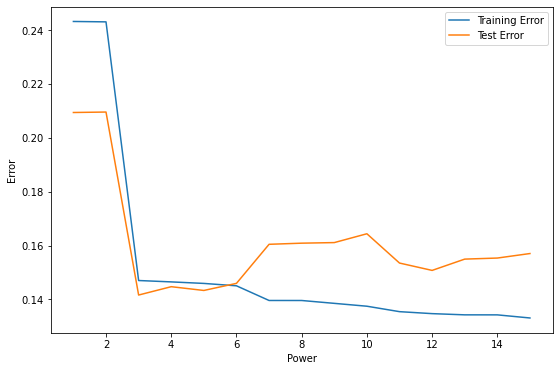

In [12]:
from sklearn import linear_model

def plotRegressionCV(data,power,plotarea,plotFlag):
    
    # Now we split the data with 30% for testing 
    X = data.drop("y",axis=1)
    y = data["y"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1278)

    predictors=[]    
    # generate list of header names for prediction
    for i in range(1,power+1): 
        predictors.append('x_%d'%i)

    X_train = X_train[predictors]
    X_test = X_test[predictors]
    y_train = y_train
    y_test = y_test

    linreg = linear_model.LinearRegression(normalize=True)
    linreg.fit(X_train,y_train)
    
#    print(linreg.coef_)
    y_pred_train = linreg.predict(X_train)
    y_pred_test = linreg.predict(X_test)

    rss_train = np.sqrt(sum((y_pred_train-y_train)**2)/len(y_pred_train))
    rss_test = np.sqrt(sum((y_pred_test-y_test)**2)/len(y_pred_test))
    
    return power, rss_train, rss_test

x = []
err_test = []
err_train = []

for n in range(1,16,1):
    p, rss_train, rss_test = plotRegressionCV(data,n,"231",True);
    print("P:",p,"RMSErr Train:",rss_train,"RMSErr Test:",rss_test)
    x.append(p)
    err_train.append(rss_train)
    err_test.append(rss_test)

plt.figure(figsize=(9,6))
plt.xlabel("Power")
plt.ylabel("Error")
plt.plot(x,err_train,label="Training Error")
plt.plot(x,err_test,label="Test Error")
plt.legend();

## Ridge Regression

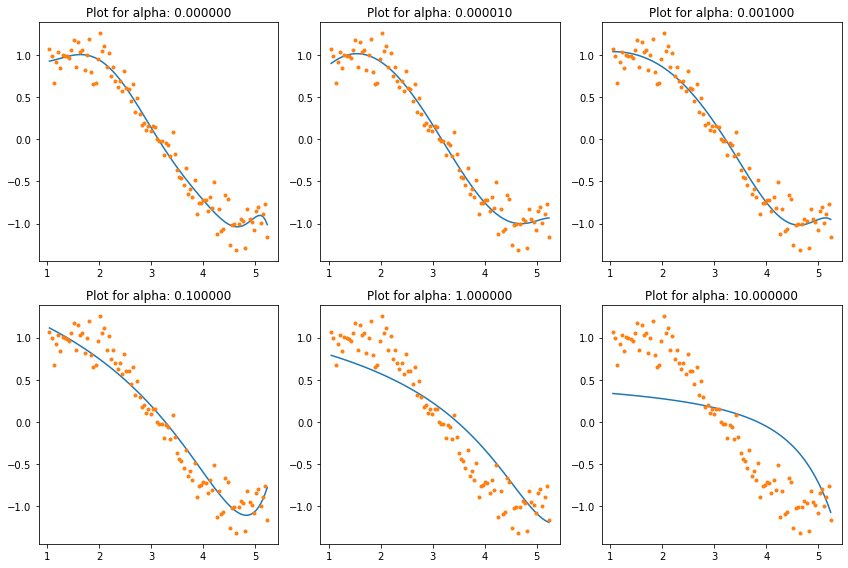

In [13]:
from sklearn.linear_model import Ridge

def ridge_regression(data, alpha, plotarea,plotFlag):
    predictors=['x']
    predictors.extend(['x_%d'%i for i in range(2,16)])
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])    
    rss = sum((y_pred-data['y'])**2)

    if plotFlag == True:
        plt.subplot(plotarea)
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %f'%alpha)
    
    return rss, ridgereg.intercept_, ridgereg.coef_

plt.figure(figsize=(12,8))
ridge_regression(data,1e-8,231,True);
ridge_regression(data,1e-5,232,True);
ridge_regression(data,1e-3,233,True);
ridge_regression(data,1e-1,234,True);
ridge_regression(data,1.0,235,True);
ridge_regression(data,10.0,236,True);

## Lasso Regression

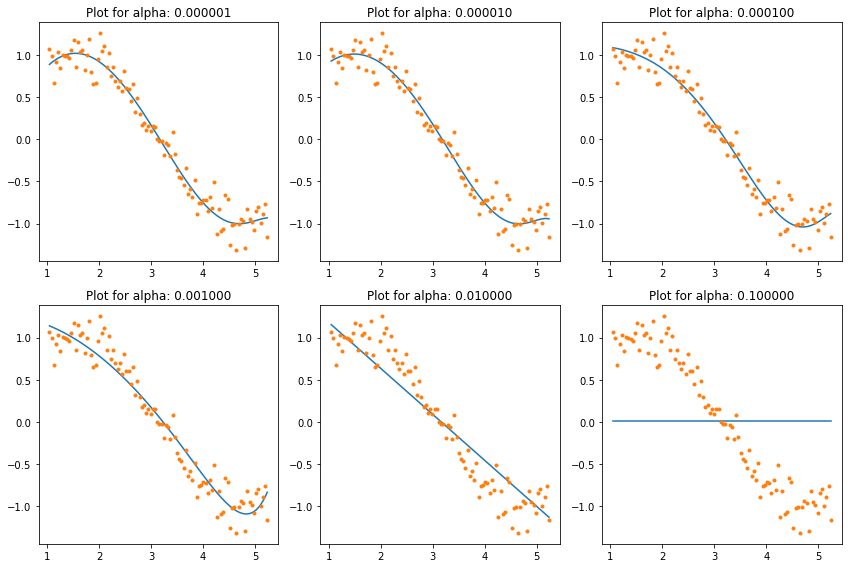

In [32]:
from sklearn.linear_model import Lasso

def lasso_regression(data, alpha, plotarea,plotFlag):
    predictors=['x']
    predictors.extend(['x_%d'%i for i in range(2,16)])
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=200000) # Added max_iter to stop convergence warning
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])    
    rss = sum((y_pred-data['y'])**2)

    if plotFlag == True:
        plt.subplot(plotarea)
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %f'%alpha)
    
    return rss, lassoreg.intercept_, lassoreg.coef_

plt.figure(figsize=(12,8))
lasso_regression(data,1e-6, 231, True);
lasso_regression(data,1e-5, 232, True);
lasso_regression(data,1e-4, 233, True);
lasso_regression(data,1e-3, 234, True);
lasso_regression(data,1e-2, 235, True);
lasso_regression(data,1e-1, 236, True);

In [31]:
data

,x,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.0472,1.06576,1.0472,1.09662,1.14838,1.20258,1.25934,1.31878,1.38102,1.4462,1.51446,1.58594,1.66079,1.73918,1.82126,1.90722,1.99724
1,1.08951,0.993691,1.08951,1.18703,1.29328,1.40904,1.53516,1.67257,1.82228,1.98539,2.1631,2.35671,2.56766,2.79749,3.04788,3.3207,3.61793
2,1.13182,0.673377,1.13182,1.28102,1.44988,1.641,1.85732,2.10215,2.37925,2.69288,3.04786,3.44963,3.90435,4.41902,5.00154,5.66084,6.40705
3,1.17413,0.921097,1.17413,1.37858,1.61864,1.90049,2.23142,2.61998,3.0762,3.61186,4.2408,4.97925,5.84629,6.86431,8.0596,9.46302,11.1108
4,1.21644,1.03107,1.21644,1.47973,1.80001,2.1896,2.66352,3.24002,3.94129,4.79435,5.83205,7.09435,8.62986,10.4977,12.7699,15.5338,18.896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.06674,-0.80013,5.06674,25.6719,130.073,659.046,"3,339.22","16,919","85,724","434,342",2.2007e+06,1.11504e+07,5.64961e+07,2.86251e+08,1.45036e+09,7.34861e+09,3.72335e+10
96,5.10905,-0.994668,5.10905,26.1024,133.359,681.337,"3,480.99","17,784.6","90,862.3","464,221",2.37173e+06,1.21173e+07,6.19079e+07,3.16291e+08,1.61595e+09,8.25596e+09,4.21802e+10
97,5.15137,-0.891749,5.15137,26.5366,136.7,704.189,"3,627.54","18,686.8","96,262.4","495,883",2.55447e+06,1.3159e+07,6.7787e+07,3.49195e+08,1.79883e+09,9.26645e+09,4.77349e+10
98,5.19368,-0.76235,5.19368,26.9743,140.096,727.612,"3,778.98","19,626.8","101,935","529,419",2.74963e+06,1.42807e+07,7.41693e+07,3.85211e+08,2.00066e+09,1.03908e+10,5.39664e+10
